## Gradient Descent Variants for Linear Regression




Developing a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, we will generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
X.shape

(50,)

In [ ]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

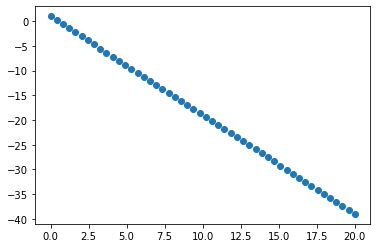

In [ ]:
plt.scatter(X,y)

#### Creating a function to perform GD for single variable linear regression.
#### The function takes the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### small values are used for stop criteria and convergence check (0.001 for both)

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
def LR_GD(X, y, LR, max_iterations, converge):
    theta_0 = 0
    theta_1 = 0
    j=5
    losses = []
    h_y = []
    h_ys=np.array([])
    iterations=[]
    thetas_0=[]
    thetas_1=[]

    for i in range (max_iterations):
        print(f"****************** Iteration {i} ********************")
        h_y = np.array(theta_0 + theta_1 * X)
        print("h(x)",h_y)
        h_ys=np.append(h_ys,h_y)
        error_vector = h_y - y
        print("Error Vector : \n")
        print(error_vector)
        j_old=j
        j = np.dot(error_vector, error_vector) / (2*len(error_vector))
        print("j= ",j)
        d_j=np.abs(j-j_old)
        d_theta_0 = np.mean(error_vector)
        d_theta_1 = np.mean(error_vector * X)
        losses.append(j)
        iterations.append(i)
        print("Gradient Vector:")
        gradient=np.array([[d_theta_0],[d_theta_1]])
        print(gradient)
        gradient_norm = np.linalg.norm([d_theta_0, d_theta_1])
        print("Gradient Vector Norm:\n", gradient_norm)

        theta_0_new = theta_0 - LR * d_theta_0
        theta_1_new = theta_1 - LR * d_theta_1
        print("theta_0_new:", theta_0_new)
        print("theta_1_new:", theta_1_new)
        print("\n")
        theta_0 = theta_0_new
        theta_1 = theta_1_new
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        if gradient_norm <converge :
            print(f"converge {converge}")
            break
        if d_j < converge :
            break


    print("****************** Training Report ********************")
    print(f"Gradient Descent converged after {i+1} iterations\n")
    print("theta_0_Opt",theta_0_new)
    print("theta_1_Opt",theta_1_new)
    print("Error Vector: \n",error_vector)
    print("cost = ",j)
    print("h(x)= y_predict: \n",h_y)
    print("y_actual: \n",y)
    print("loss",losses)

    return  losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys



LR = 0.0005
max_iterations = 300
converge = 0.001
losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys= LR_GD(X, y, LR, max_iterations, converge)


****************** Iteration 0 ********************
h(x) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector : 

[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j=  249.88775510204084
Gradient Vector:
[[ 19.       ]
 [259.3877551]]
Gradient Vector Norm:
 260.08269357432516
theta_0_new: -0.0095
theta_1_new: -0.1296938775510

#### Calculate r2 score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y, h_y)
r2

0.9975395965150151

#### Plot loss vs. epochs

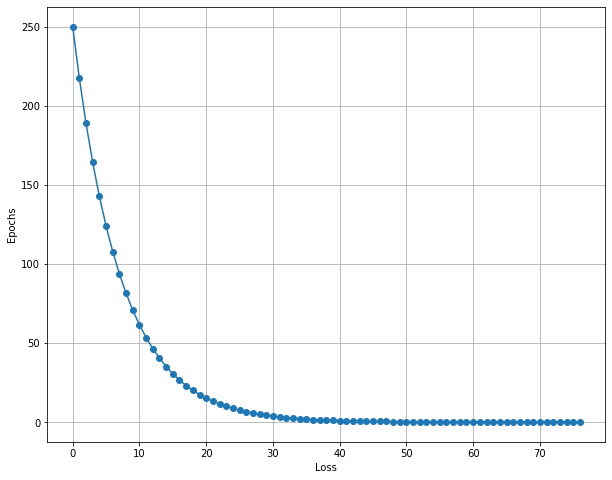

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.plot(iterations,losses,marker="o")

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

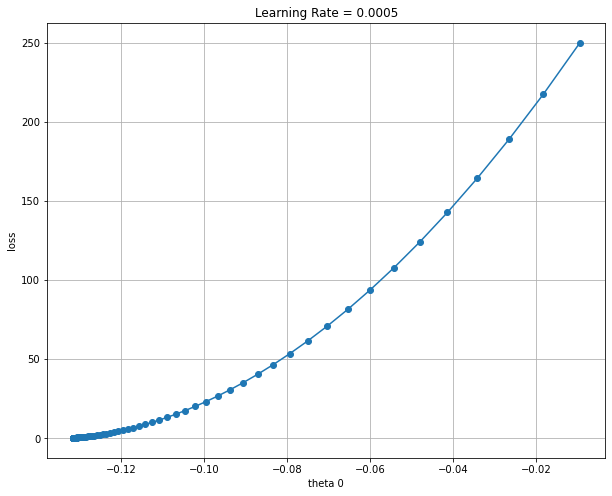

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 0")
plt.ylabel("loss")
plt.plot(thetas_0,losses,marker="o")
plt.show()

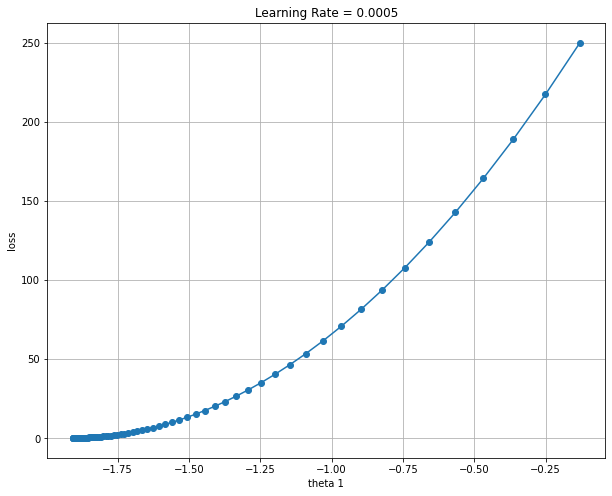

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 1")
plt.ylabel("loss")
plt.plot(thetas_1,losses,marker="o")
plt.show()

#### Plot of all regression lines till converge

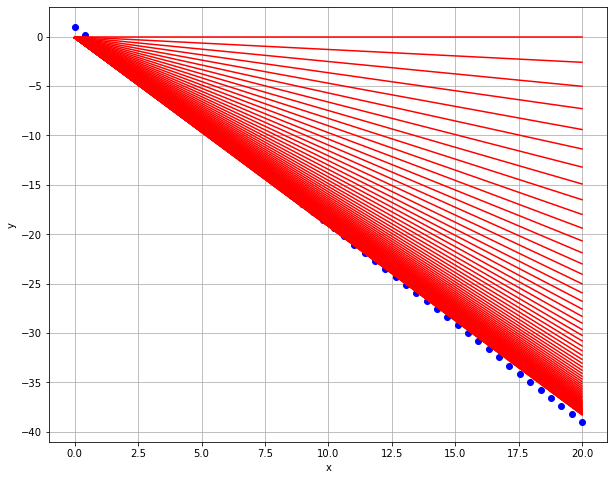

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,h_ys.reshape(77,50).T,"r-")
plt.show()

#### Plot the best regression line

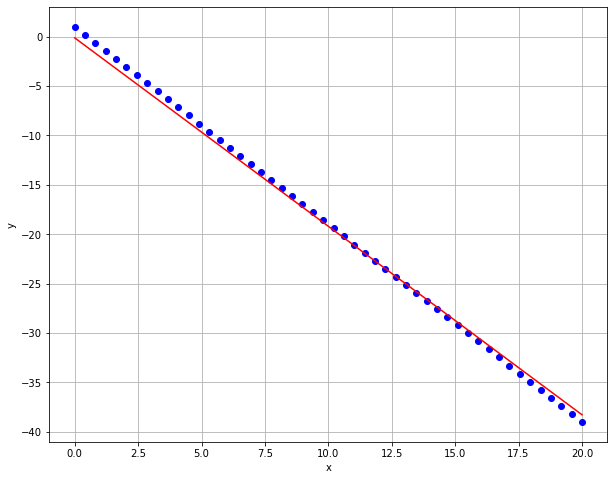

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,h_y,"r-")
plt.show()

#### Trying different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### All regression lines till converge, and the best regression line and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [ ]:
def LR_GD(X, y, LR, max_iterations, converge):
    theta_0 = 0
    theta_1 = 0
    j=5
    losses = []
    h_y = []
    h_ys=np.array([])
    iterations=[]
    thetas_0=[]
    thetas_1=[]

    for i in range (max_iterations):
        print(f"****************** Iteration {i} ********************")
        h_y = np.array(theta_0 + theta_1 * X)
        print("h(x)",h_y)
        h_ys=np.append(h_ys,h_y)
        error_vector = h_y - y
        print("Error Vector : \n")
        print(error_vector)
        j_old=j
        j = np.dot(error_vector, error_vector) / (2*len(error_vector))
        print("j= ",j)
        d_j=np.abs(j-j_old)
        d_theta_0 = np.mean(error_vector)
        d_theta_1 = np.mean(error_vector * X)
        losses.append(j)
        iterations.append(i)
        print("Gradient Vector:")
        gradient=np.array([[d_theta_0],[d_theta_1]])
        print(gradient)
        gradient_norm = np.linalg.norm([d_theta_0, d_theta_1])
        print("Gradient Vector Norm:\n", gradient_norm)

        theta_0_new = theta_0 - LR * d_theta_0
        theta_1_new = theta_1 - LR * d_theta_1
        print("theta_0_new:", theta_0_new)
        print("theta_1_new:", theta_1_new)
        print("\n")
        theta_0 = theta_0_new
        theta_1 = theta_1_new
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        if gradient_norm <converge :
            print(f"converge {converge}")
            break
        if d_j < converge :
            break


    print("****************** Training Report ********************")
    print(f"Gradient Descent converged after {i+1} iterations\n")
    print("theta_0_Opt",theta_0_new)
    print("theta_1_Opt",theta_1_new)
    print("Error Vector: \n",error_vector)
    print("cost = ",j)
    print("h(x)= y_predict: \n",h_y)
    print("y_actual: \n",y)
    print("loss",losses)

    return  losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys



LR = 0.00005
max_iterations = 1000
converge = 0.001
losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys= LR_GD(X, y, LR, max_iterations, converge)


****************** Iteration 0 ********************
h(x) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector : 

[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j=  249.88775510204084
Gradient Vector:
[[ 19.       ]
 [259.3877551]]
Gradient Vector Norm:
 260.08269357432516
theta_0_new: -0.00095
theta_1_new: -0.012969387755

In [ ]:
r2 = r2_score(y, h_y)
r2

0.9965793400861428

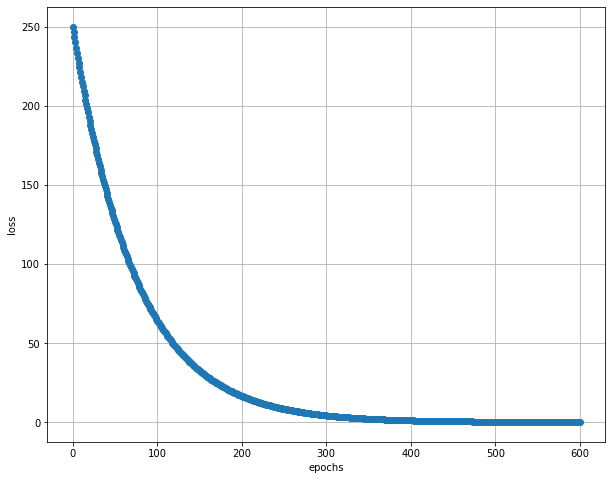

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()

plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(iterations,losses,"o")
plt.show()

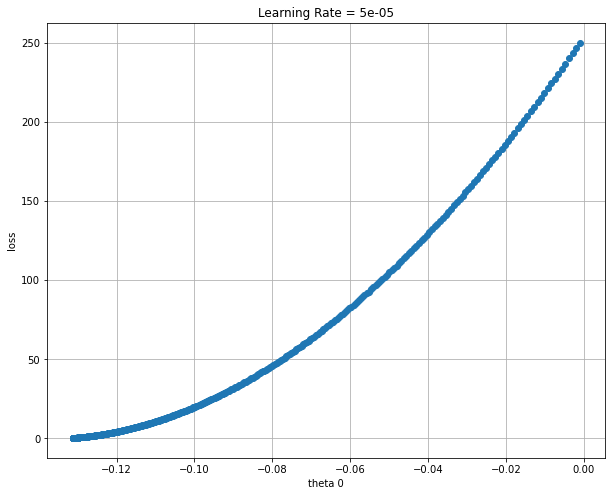

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 0")
plt.ylabel("loss")
plt.plot(thetas_0,losses,"o")
plt.show()

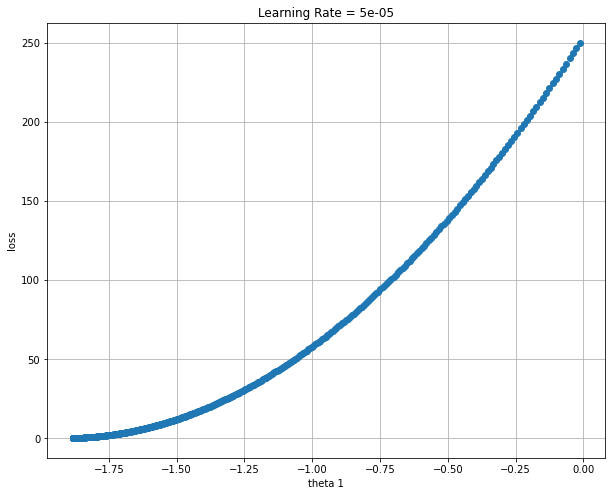

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 1")
plt.ylabel("loss")
plt.plot(thetas_1,losses,"o")
plt.show()

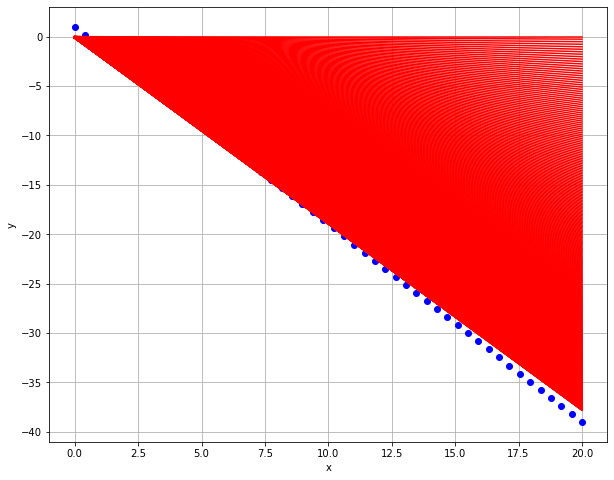

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,h_ys.reshape(601,50).T,"r-")
plt.show()

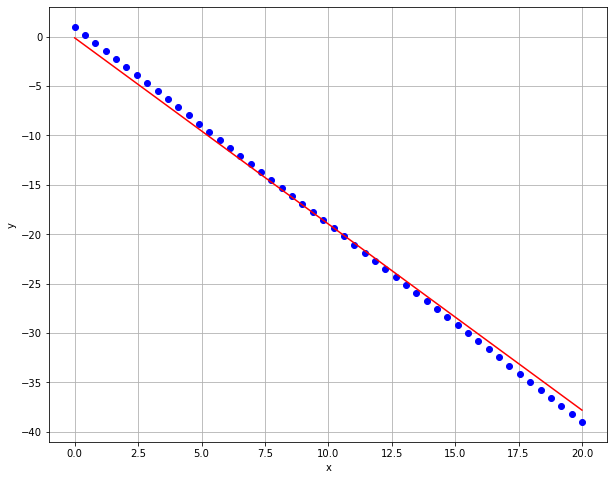

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,h_y,"r-")
plt.show()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [ ]:
def LR_GD(X, y, LR, max_iterations, converge):
    theta_0 = 0
    theta_1 = 0
    j=5
    losses = []
    h_y = []
    h_ys=np.array([])
    iterations=[]
    thetas_0=[]
    thetas_1=[]

    for i in range (max_iterations):
        print(f"****************** Iteration {i} ********************")
        h_y = np.array(theta_0 + theta_1 * X)
        print("h(x)",h_y)
        h_ys=np.append(h_ys,h_y)
        error_vector = h_y - y
        print("Error Vector : \n")
        print(error_vector)
        j_old=j
        j = np.dot(error_vector, error_vector) / (2*len(error_vector))
        print("j= ",j)
        d_j=np.abs(j-j_old)
        d_theta_0 = np.mean(error_vector)
        d_theta_1 = np.mean(error_vector * X)
        losses.append(j)
        iterations.append(i)
        print("Gradient Vector:")
        gradient=np.array([[d_theta_0],[d_theta_1]])
        print(gradient)
        gradient_norm = np.linalg.norm([d_theta_0, d_theta_1])
        print("Gradient Vector Norm:\n", gradient_norm)

        theta_0_new = theta_0 - LR * d_theta_0
        theta_1_new = theta_1 - LR * d_theta_1
        print("theta_0_new:", theta_0_new)
        print("theta_1_new:", theta_1_new)
        print("\n")
        theta_0 = theta_0_new
        theta_1 = theta_1_new
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        if gradient_norm <converge :
            print(f"converge {converge}")
            break
        if d_j < converge :
            break


    print("****************** Training Report ********************")
    print(f"Gradient Descent converged after {i+1} iterations\n")
    print("theta_0_Opt",theta_0_new)
    print("theta_1_Opt",theta_1_new)
    print("Error Vector: \n",error_vector)
    print("cost = ",j)
    print("h(x)= y_predict: \n",h_y)
    print("y_actual: \n",y)
    print("loss",losses)

    return  losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys



LR = 0.005
max_iterations = 300
converge = 0.001
losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys= LR_GD(X, y, LR, max_iterations, converge)


****************** Iteration 0 ********************
h(x) [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector : 

[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j=  249.88775510204084
Gradient Vector:
[[ 19.       ]
 [259.3877551]]
Gradient Vector Norm:
 260.08269357432516
theta_0_new: -0.095
theta_1_new: -1.29693877551020

In [ ]:
r2 = r2_score(y, h_y)
r2

0.9976200723230484

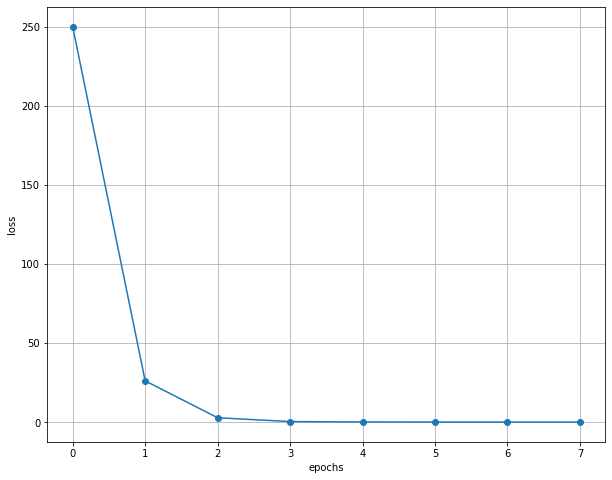

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()

plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(iterations,losses,"o-")
plt.show()

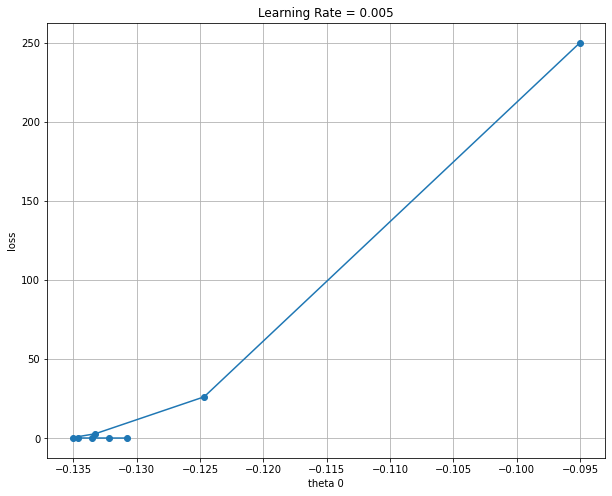

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 0")
plt.ylabel("loss")
plt.plot(thetas_0,losses,"o-")
plt.show()

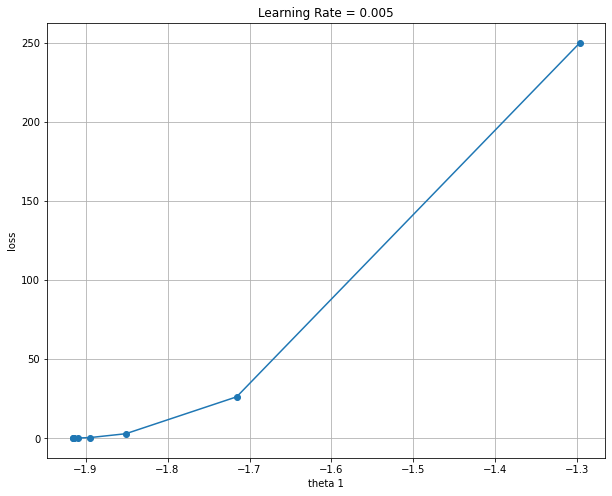

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 1")
plt.ylabel("loss")
plt.plot(thetas_1,losses,"o-")
plt.show()

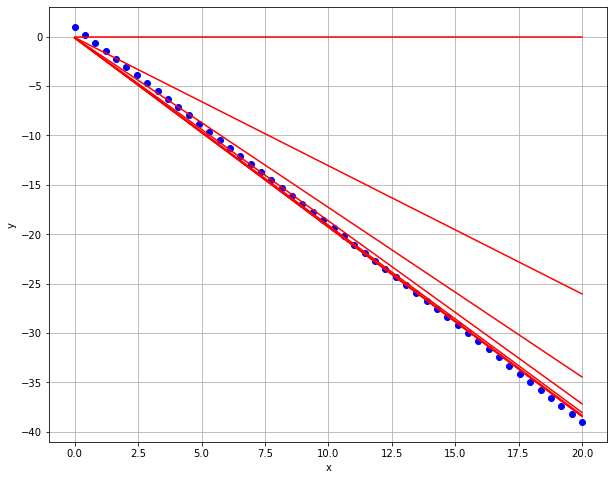

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,h_ys.reshape(8,50).T,"r-")
plt.show()

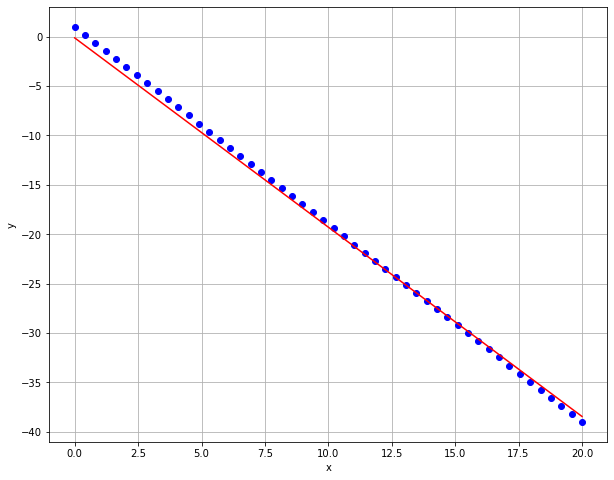

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,h_y,"r-")
plt.show()

## Stochastic GD

#### An Update the implementation of the Batch GD to be Stochastic
#### Comparing to the Batch GD.
#### Data is shuffled

In [ ]:
w=np.column_stack([X,y])
np.random.seed(101)
np.random.shuffle(w)
print(w)
X=w[:,0]
y=w[:,1]

[[ 15.10204082 -29.20408163]
 [  5.71428571 -10.42857143]
 [  8.57142857 -16.14285714]
 [ 13.06122449 -25.12244898]
 [  8.97959184 -16.95918367]
 [  0.40816327   0.18367347]
 [ 10.6122449  -20.2244898 ]
 [ 18.7755102  -36.55102041]
 [ 17.14285714 -33.28571429]
 [ 19.18367347 -37.36734694]
 [  6.53061224 -12.06122449]
 [  9.79591837 -18.59183673]
 [  2.85714286  -4.71428571]
 [ 18.36734694 -35.73469388]
 [  7.34693878 -13.69387755]
 [  1.2244898   -1.44897959]
 [ 16.73469388 -32.46938776]
 [ 12.24489796 -23.48979592]
 [  6.12244898 -11.24489796]
 [  8.16326531 -15.32653061]
 [ 17.55102041 -34.10204082]
 [ 15.51020408 -30.02040816]
 [ 17.95918367 -34.91836735]
 [ 15.91836735 -30.83673469]
 [  4.08163265  -7.16326531]
 [ 20.         -39.        ]
 [ 10.20408163 -19.40816327]
 [ 13.46938776 -25.93877551]
 [ 14.69387755 -28.3877551 ]
 [  0.81632653  -0.63265306]
 [ 11.02040816 -21.04081633]
 [ 13.87755102 -26.75510204]
 [ 14.28571429 -27.57142857]
 [  3.26530612  -5.53061224]
 [  7.75510204

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
def LR_GD(X, y, LR, max_iterations, converge):
    theta_0 = 0
    theta_1 = 0
    j=5
    losses = []
    final_loss=[]
    h_y = []
    h_ys=[]
    iterations=[]
    thetas_0=[]
    thetas_1=[]


    for i in range (max_iterations):
        print(f"****************** Epoch {i} ********************")
        for p in range(len(X)):
            h_y = theta_0 + theta_1 * X[p]
            h_ys.append(h_y)
            error_vector = h_y - y[p]
            j = (error_vector**2) / 2
            d_theta_0 = error_vector
            d_theta_1 = error_vector * X[p]
            losses.append(j)
            gradient=np.array([[d_theta_0],[d_theta_1]])
            gradient_norm = np.linalg.norm(gradient)
            theta_0_new = theta_0 - LR * d_theta_0
            theta_1_new = theta_1 - LR * d_theta_1
            theta_0 = theta_0_new
            theta_1 = theta_1_new
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)

        final_loss.append(j)
        iterations.append(i)
        if gradient_norm <converge :
            print(f"converge {converge}")
            break
        if len(final_loss)>1 and np.abs(final_loss[i]-final_loss[i-1]) < converge :
            break
        print("cost= ",j)
        print("Gradient Vector:")
        print(gradient)
        print("Gradient Vector Norm:\n", gradient_norm)
        print("theta_0_new:", theta_0_new)
        print("theta_1_new:", theta_1_new)


    print("****************** Training Report ********************")
    print(f"Gradient Descent converged after {i+1} epochs\n")
    print("theta_0_Opt",theta_0_new)
    print("theta_1_Opt",theta_1_new)
    print("Error Vector: \n",error_vector)
    print("cost = ",j)
    print("h(x)= y_predict: \n",h_y)
    print("y_actual: \n",y)
    print("loss",losses)

    return  losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys,gradient_norm,final_loss



LR = 0.0005
max_iterations = 300
converge = 0.001
losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys,gradient_norm,final_loss= LR_GD(X, y, LR, max_iterations, converge)


****************** Epoch 0 ********************
cost=  0.25209950460007696
Gradient Vector:
[[0.71006972]
 [8.98455566]]
Gradient Vector Norm:
 9.012571185993627
theta_0_new: -0.12761222125212127
theta_1_new: -1.8592841835063174
****************** Epoch 1 ********************
cost=  0.00017746175474585356
Gradient Vector:
[[0.01883941]
 [0.23837626]]
Gradient Vector Norm:
 0.23911955711901475
theta_0_new: -0.12397684636948911
theta_1_new: -1.909800583000258
****************** Epoch 2 ********************
****************** Training Report ********************
Gradient Descent converged after 3 epochs

theta_0_Opt -0.1168602386254817
theta_1_Opt -1.9117125478064034
Error Vector: 
 0.0002678768054096281
cost =  3.587899143823388e-08
h(x)= y_predict: 
 -24.305854572174184
y_actual: 
 [-29.20408163 -10.42857143 -16.14285714 -25.12244898 -16.95918367
   0.18367347 -20.2244898  -36.55102041 -33.28571429 -37.36734694
 -12.06122449 -18.59183673  -4.71428571 -35.73469388 -13.69387755
  -1.44897

In [ ]:
y_predicted = theta_0 + theta_1 * X
r2 = r2_score(y, y_predicted)
r2

0.9976568143190673

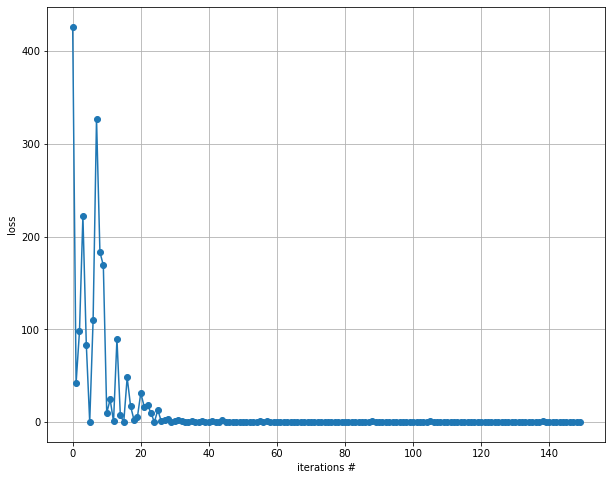

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()

plt.xlabel("iterations #")
plt.ylabel("loss")
plt.plot(losses,"o-")

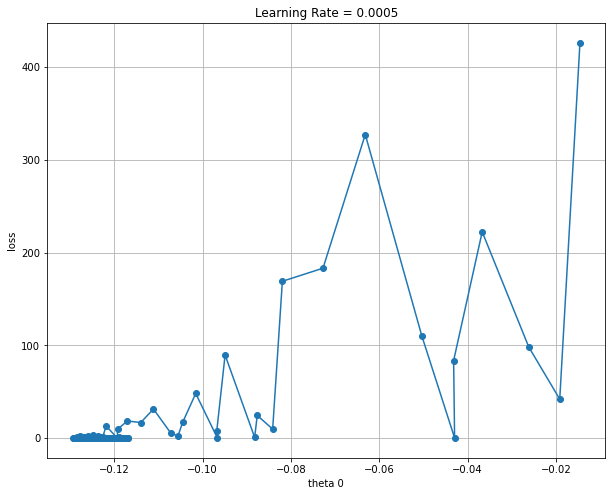

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 0")
plt.ylabel("loss")
plt.plot(thetas_0,losses,"o-")
plt.show()

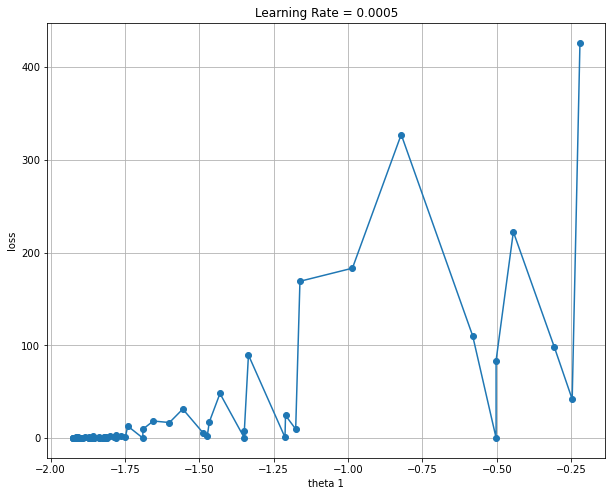

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 1")
plt.ylabel("loss")
plt.plot(thetas_1,losses,"o-")
plt.show()

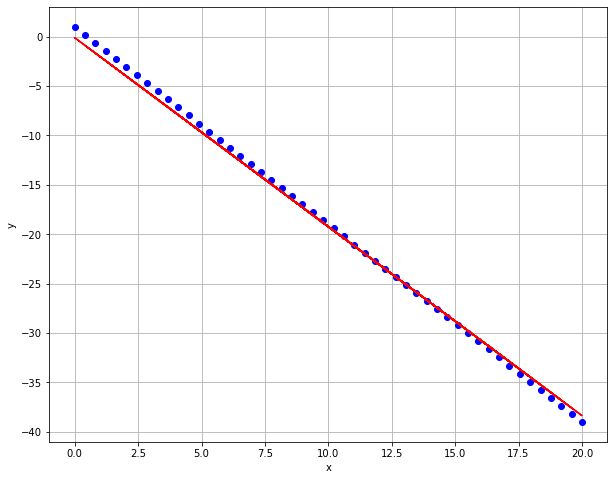

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,y_predicted,"r-")
plt.show()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [ ]:
LR = 0.0001
max_iterations = 300
converge = 0.001
losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys,gradient_norm,final_loss= LR_GD(X, y, LR, max_iterations, converge)

****************** Epoch 0 ********************
cost=  77.08339441916262
Gradient Vector:
[[ 12.41639194]
 [157.10536742]]
Gradient Vector Norm:
 157.59525139074904
theta_0_new: -0.0684094452130673
theta_1_new: -0.9500743631688013
****************** Epoch 1 ********************
cost=  19.384194190624033
Gradient Vector:
[[ 6.22642661]
 [78.78335716]]
Gradient Vector Norm:
 79.02901842704571
theta_0_new: -0.10214664348275128
theta_1_new: -1.428733851630339
****************** Epoch 2 ********************
cost=  4.830561509456486
Gradient Vector:
[[ 3.10823471]
 [39.3286841 ]]
Gradient Vector Norm:
 39.45131830456044
theta_0_new: -0.11841844022588549
theta_1_new: -1.6699154908906342
****************** Epoch 3 ********************
cost=  1.181899543652157
Gradient Vector:
[[ 1.53746515]
 [19.45364067]]
Gradient Vector Norm:
 19.514300769285008
theta_0_new: -0.12589287520313883
theta_1_new: -1.7914663162395936
****************** Epoch 4 ********************
cost=  0.2784205564157234
Gradien

In [ ]:
y_predicted = theta_0 + theta_1 * X
r2 = r2_score(y, y_predicted)
r2

0.9976375173449827

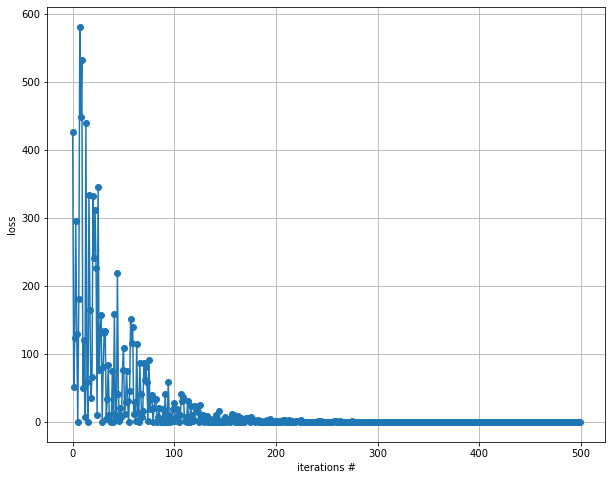

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()

plt.xlabel("iterations #")
plt.ylabel("loss")
plt.plot(losses,"o-")

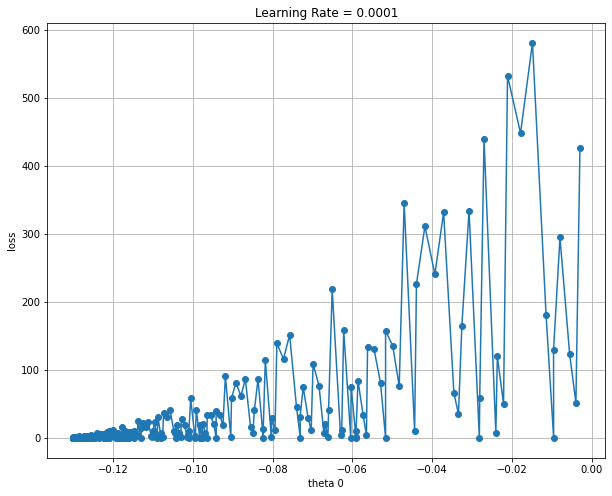

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 0")
plt.ylabel("loss")
plt.plot(thetas_0,losses,"o-")
plt.show()

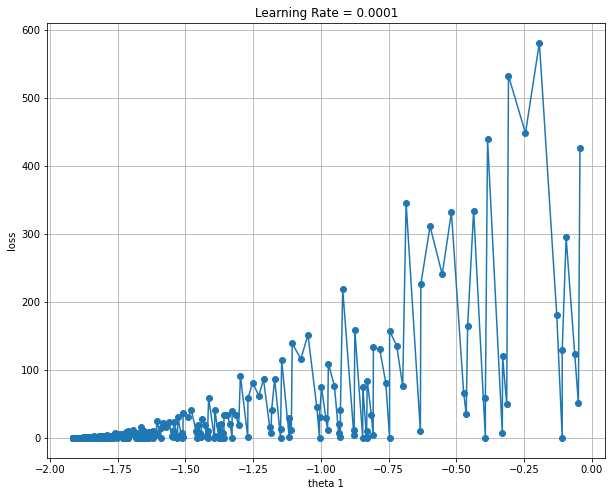

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 1")
plt.ylabel("loss")
plt.plot(thetas_1,losses,"o-")
plt.show()

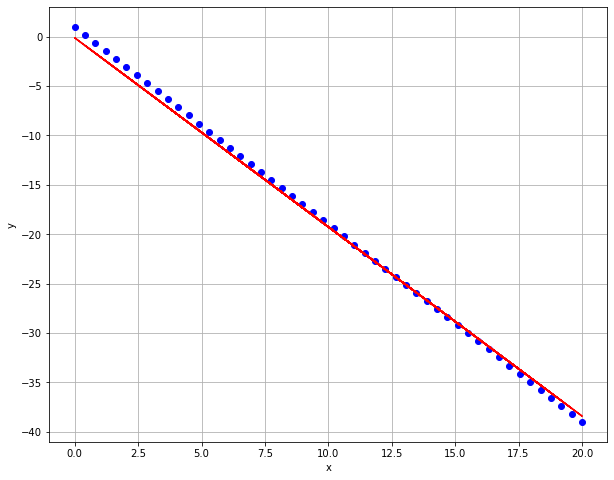

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,y_predicted,"r-")
plt.show()

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [ ]:
LR = 0.00007
max_iterations = 300
converge = 0.001
losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys,gradient_norm,final_loss= LR_GD(X, y, LR, max_iterations, converge)

****************** Epoch 0 ********************
cost=  115.77496572621477
Gradient Vector:
[[ 15.21676482]
 [192.53865685]]
Gradient Vector Norm:
 193.13902845642275
theta_0_new: -0.0526625963181957
theta_1_new: -0.7277523032709559
****************** Epoch 1 ********************
cost=  44.27618208821564
Gradient Vector:
[[  9.41022657]
 [119.06817298]]
Gradient Vector Norm:
 119.43944985086782
theta_0_new: -0.08492087485410607
theta_1_new: -1.1789316302972381
****************** Epoch 2 ********************
cost=  16.881779141921317
Gradient Vector:
[[ 5.81064181]
 [73.52240662]]
Gradient Vector Norm:
 73.75166325784151
theta_0_new: -0.10453040045312463
theta_1_new: -1.4586570394661047
****************** Epoch 3 ********************
cost=  6.40532844123651
Gradient Vector:
[[ 3.5791978 ]
 [45.28780888]]
Gradient Vector Norm:
 45.42902475523053
theta_0_new: -0.11629902421809676
theta_1_new: -1.6320942310148396
****************** Epoch 4 ********************
cost=  2.4109782978673917
Grad

In [ ]:
y_predicted = theta_0 + theta_1 * X
r2 = r2_score(y, y_predicted)
r2

0.9976193527156806

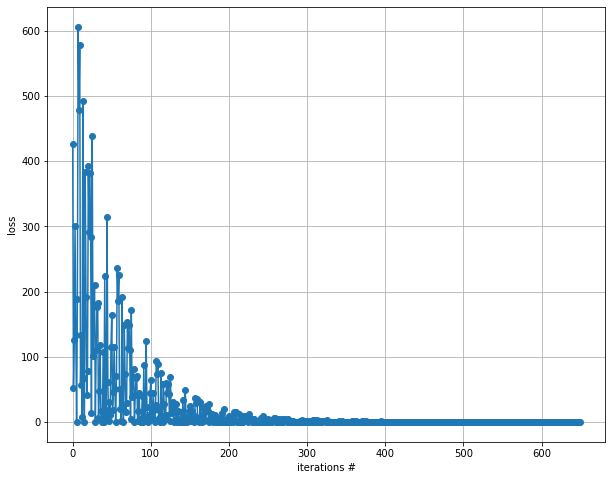

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()

plt.xlabel("iterations #")
plt.ylabel("loss")
plt.plot(losses,"o-")

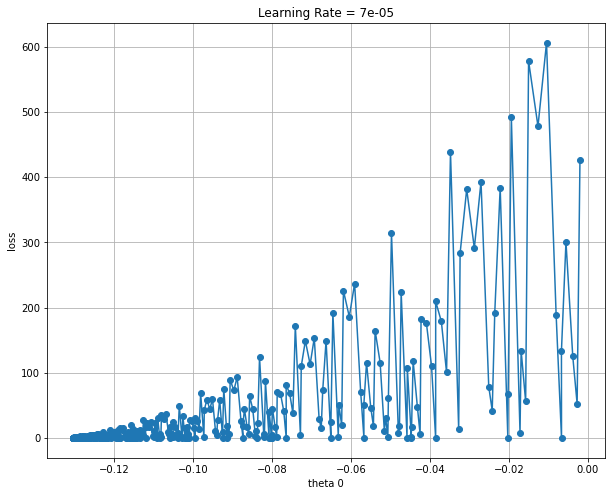

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 0")
plt.ylabel("loss")
plt.plot(thetas_0,losses,"o-")
plt.show()

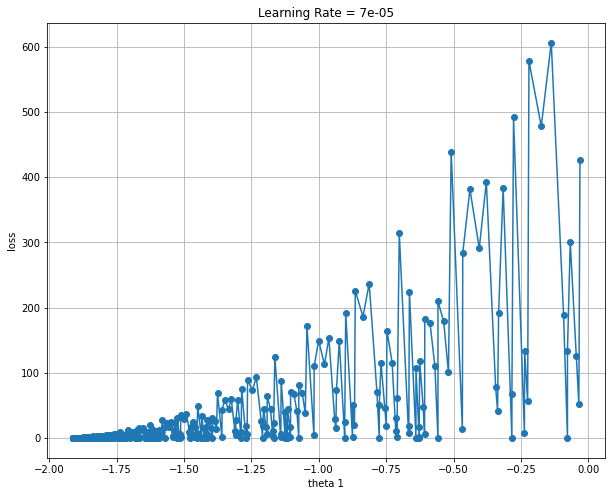

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 1")
plt.ylabel("loss")
plt.plot(thetas_1,losses,"o-")
plt.show()

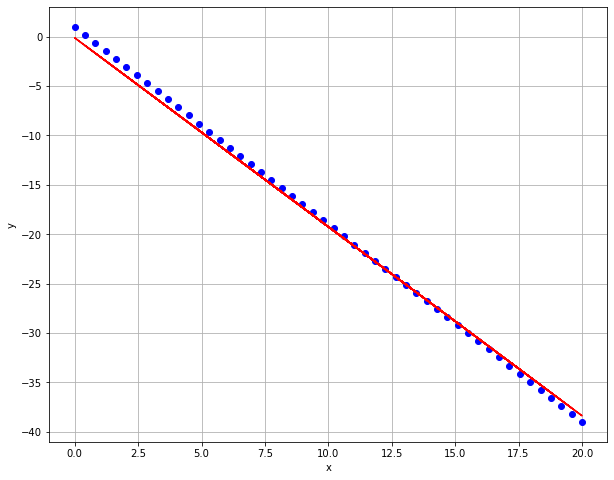

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,y_predicted,"r-")
plt.show()

## Mini-Batch GD

#### AN Update to the implementation of the Batch GD to be Mini-Batch
#### Batch size is changed to see the effect
#### Data is shuffled

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [ ]:
def LR_GD(X, y, LR, max_iterations, converge,size):
    theta_0 = 0
    theta_1 = 0
    j=5
    losses = []
    final_loss=[]
    h_y = []
    h_ys=[]
    iterations=[]
    thetas_0=[]
    thetas_1=[]

    for i in range (max_iterations):
        print(f"****************** Epoch {i} ********************")
        for p in range(0,len(X),size):
            h_y = theta_0 + theta_1 * X[p:p+size]
            h_ys.append(h_y)
            error_vector = h_y- y[p:p+size]
            j = 0.5 * np.dot(error_vector,error_vector) / (len(X[p:p+size]))
            d_theta_0 = np.sum(error_vector) / (len(X[p:p+size]))
            d_theta_1 = np.sum(error_vector * X[p:p+size]) / (len(X[p:p+size]))
            losses.append(j)
            gradient=np.array([[d_theta_0],[d_theta_1]])
            gradient_norm = np.linalg.norm(gradient)
            theta_0_new = theta_0 - LR * d_theta_0
            theta_1_new = theta_1 - LR * d_theta_1
            theta_0 = theta_0_new
            theta_1 = theta_1_new
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)

        final_loss.append(j)
        iterations.append(i)
        if gradient_norm <converge :
            print(f"converge {converge}")
            break
        if len(final_loss)>1 and np.abs(final_loss[i]-final_loss[i-1]) < converge :
            break
        print("cost= ",j)
        print("Gradient Vector:")
        print(gradient)
        print("Gradient Vector Norm:\n", gradient_norm)
        print("theta_0_new:", theta_0_new)
        print("theta_1_new:", theta_1_new)


    print("****************** Training Report ********************")
    print(f"Gradient Descent converged after {i+1} epochs\n")
    print("theta_0_Opt",theta_0_new)
    print("theta_1_Opt",theta_1_new)
    print("Error Vector: \n",error_vector)
    print("cost = ",j)
    print("h(x)= y_predict: \n",h_y)
    print("y_actual: \n",y)
    print("loss",losses)

    return  losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys,gradient_norm,final_loss



LR = 0.0005
max_iterations = 300
converge = 0.001
size=5
losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys,gradient_norm,final_loss= LR_GD(X, y, LR, max_iterations, converge,size)


****************** Epoch 0 ********************
cost=  28.749693808097824
Gradient Vector:
[[ 6.55556162]
 [60.7816351 ]]
Gradient Vector Norm:
 61.13413574891091
theta_0_new: -0.06978924724113063
theta_1_new: -0.9693635987180408
****************** Epoch 1 ********************
cost=  6.467967792096372
Gradient Vector:
[[ 2.96619847]
 [28.61439115]]
Gradient Vector Norm:
 28.767719999075442
theta_0_new: -0.103504017832776
theta_1_new: -1.44799256525687
****************** Epoch 2 ********************
cost=  1.3823105180838944
Gradient Vector:
[[ 1.19448224]
 [12.73525899]]
Gradient Vector Norm:
 12.791153559071402
theta_0_new: -0.11940982177970424
theta_1_new: -1.6843464761632723
****************** Epoch 3 ********************
cost=  0.3127883778881081
Gradient Vector:
[[0.32013523]
 [4.89754198]]
Gradient Vector Norm:
 4.9079938882509655
theta_0_new: -0.12652431396007574
theta_1_new: -1.8010894682190426
****************** Epoch 4 ********************
cost=  0.1357652288994512
Gradient V

In [ ]:
y_predicted = theta_0 + theta_1 * X
r2 = r2_score(y, y_predicted)
r2

0.9976565632956897

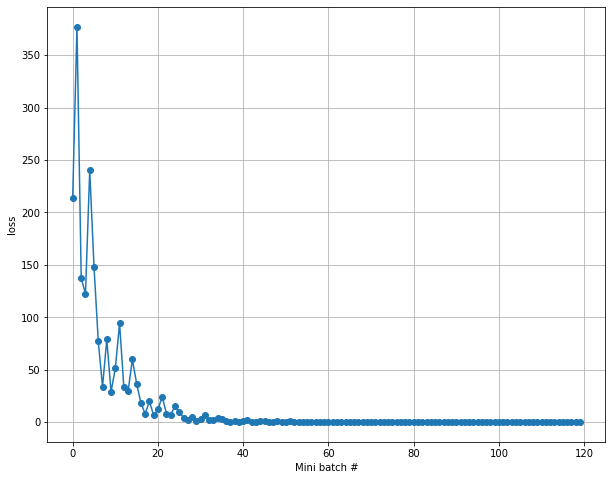

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()

plt.xlabel("Mini batch #")
plt.ylabel("loss")
plt.plot(losses,"o-")

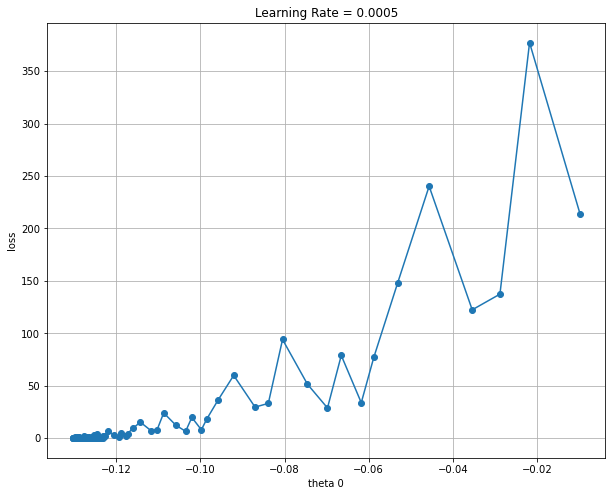

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 0")
plt.ylabel("loss")
plt.plot(thetas_0,losses,"o-")
plt.show()

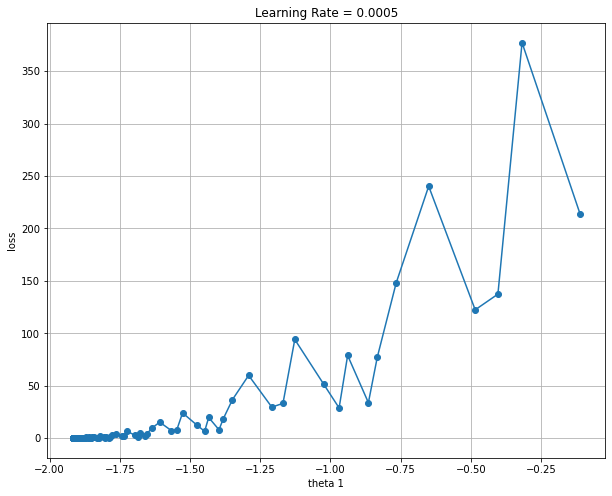

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 1")
plt.ylabel("loss")
plt.plot(thetas_1,losses,"o-")
plt.show()

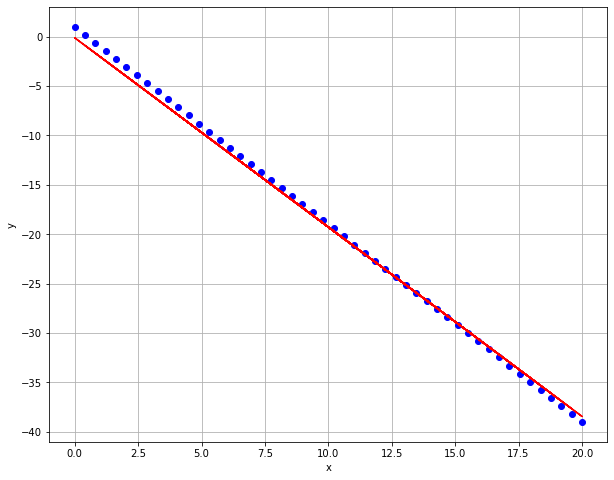

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,y_predicted,"r-")
plt.show()

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [ ]:
LR = 0.0005
max_iterations = 300
converge = 0.001
size=10
losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys,gradient_norm,final_loss= LR_GD(X, y, LR, max_iterations, converge,size)

****************** Epoch 0 ********************
cost=  102.73346702490926
Gradient Vector:
[[ 11.3640554]
 [144.4464855]]
Gradient Vector Norm:
 144.89281876537092
theta_0_new: -0.04124848216567694
theta_1_new: -0.5683087110235961
****************** Epoch 1 ********************
cost=  50.67396313911797
Gradient Vector:
[[  7.86063891]
 [101.34687856]]
Gradient Vector Norm:
 101.65126382467815
theta_0_new: -0.07003863931709524
theta_1_new: -0.9679738990170041
****************** Epoch 2 ********************
cost=  25.000619176542024
Gradient Vector:
[[ 5.39703213]
 [71.03829803]]
Gradient Vector Norm:
 71.24301890211146
theta_0_new: -0.0900679276338996
theta_1_new: -1.2490447040747128
****************** Epoch 3 ********************
cost=  12.354639621109397
Gradient Vector:
[[ 3.66464568]
 [49.72468931]]
Gradient Vector Norm:
 49.859546276997584
theta_0_new: -0.10393649132998092
theta_1_new: -1.4467169419665995
****************** Epoch 4 ********************
cost=  6.1360789796765385
Gra

In [ ]:
y_predicted = theta_0 + theta_1 * X
r2 = r2_score(y, y_predicted)
r2

0.997580216797697

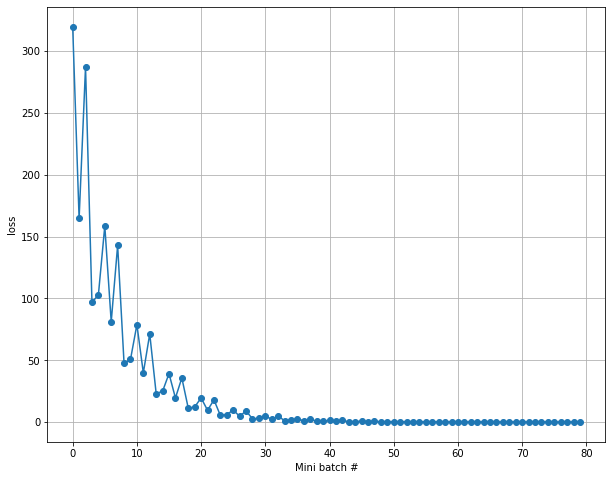

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()

plt.xlabel("Mini batch #")
plt.ylabel("loss")
plt.plot(losses,"o-")

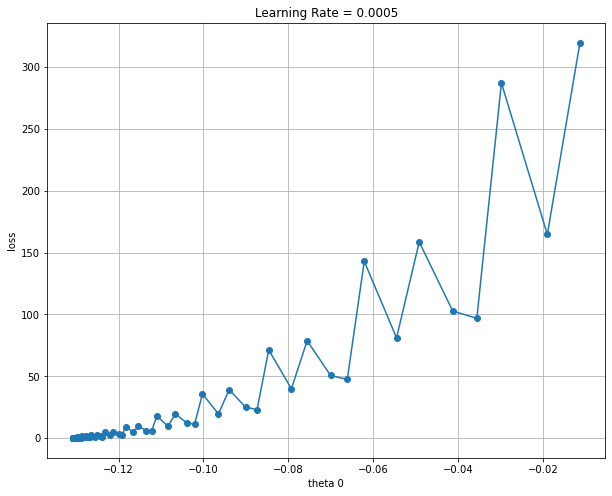

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 0")
plt.ylabel("loss")
plt.plot(thetas_0,losses,"o-")
plt.show()

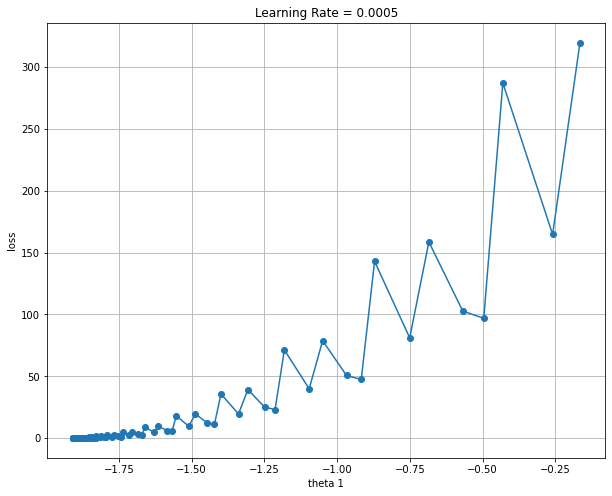

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 1")
plt.ylabel("loss")
plt.plot(thetas_1,losses,"o-")
plt.show()

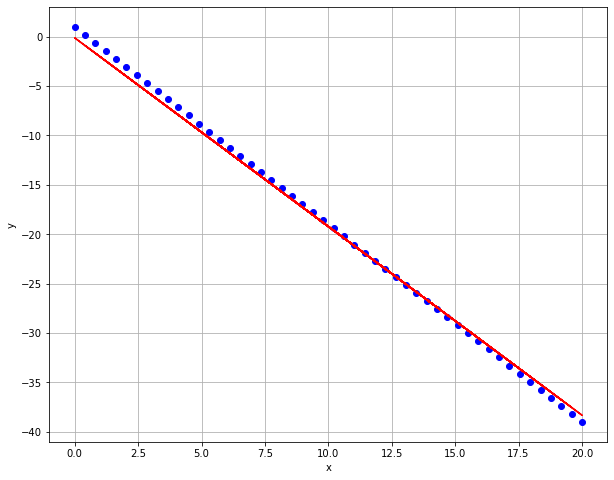

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,y_predicted,"r-")
plt.show()

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [ ]:
LR = 0.0005
max_iterations = 300
converge = 0.001
size=20
losses, h_y , iterations, error_vector ,j,theta_0,theta_1,thetas_0,thetas_1,h_ys,gradient_norm,final_loss= LR_GD(X, y, LR, max_iterations, converge,size)

****************** Epoch 0 ********************
cost=  138.95396590573586
Gradient Vector:
[[ 13.28117888]
 [168.03253493]]
Gradient Vector Norm:
 168.5565854723684
theta_0_new: -0.02580691049406296
theta_1_new: -0.34956845854908747
****************** Epoch 1 ********************
cost=  92.72539732483764
Gradient Vector:
[[ 10.77607508]
 [137.21606657]]
Gradient Vector Norm:
 137.6385582583373
theta_0_new: -0.04681622152392541
theta_1_new: -0.6352969942726102
****************** Epoch 2 ********************
cost=  61.87397496661906
Gradient Vector:
[[  8.72854325]
 [112.02806465]]
Gradient Vector Norm:
 112.36758756895237
theta_0_new: -0.06390421550487006
theta_1_new: -0.8688455261450846
****************** Epoch 3 ********************
cost=  41.28962175444344
Gradient Vector:
[[ 7.05501102]
 [91.44052857]]
Gradient Vector Norm:
 91.71228622737436
theta_0_new: -0.07778712789992066
theta_1_new: -1.0597443693715909
****************** Epoch 4 ********************
cost=  27.55953025561115
Gr

In [ ]:
y_predicted = theta_0 + theta_1 * X
r2 = r2_score(y, y_predicted)
r2

0.9975368136904278

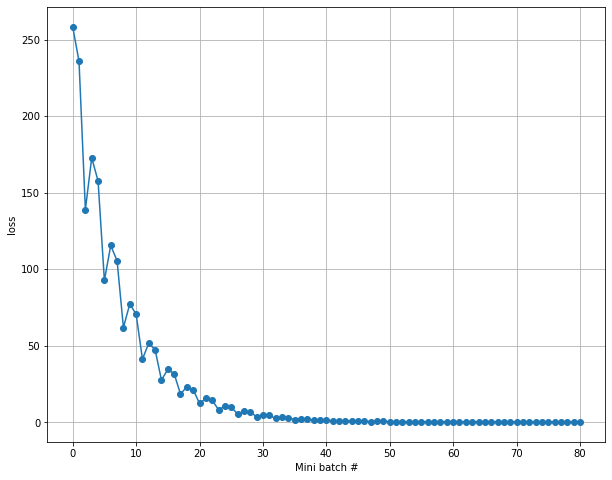

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()

plt.xlabel("Mini batch #")
plt.ylabel("loss")
plt.plot(losses,"o-")

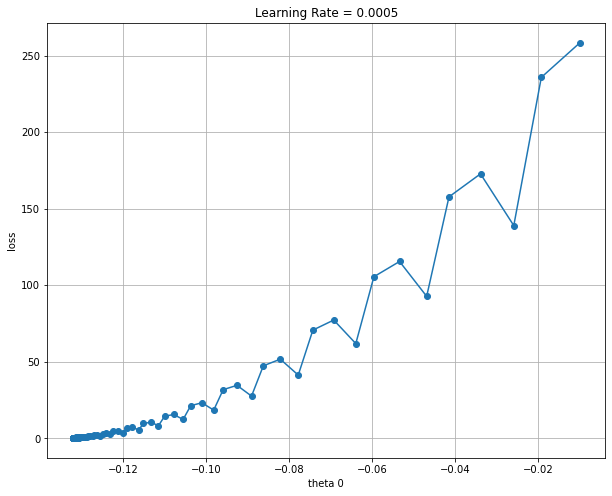

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 0")
plt.ylabel("loss")
plt.plot(thetas_0,losses,"o-")
plt.show()

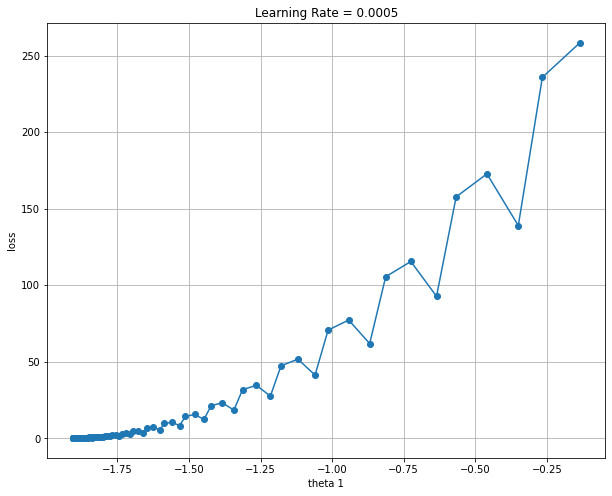

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title(f"Learning Rate = {LR}")
plt.xlabel("theta 1")
plt.ylabel("loss")
plt.plot(thetas_1,losses,"o-")
plt.show()

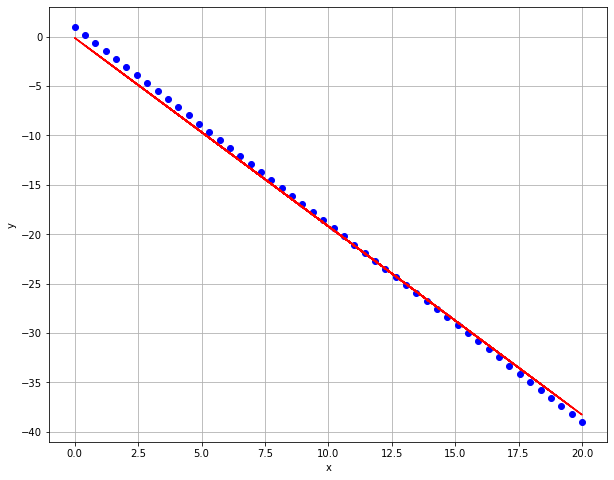

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X,y,"bo")
plt.plot(X,y_predicted,"r-")
plt.show()